In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

In [3]:
"""Außen"""
RS=8500.
def a(R):  #R scaliert auf Sonnenradius
	return R/RS

def n_A_H2(R,z):	# Dichte molekularer Wasserstoff
	return np.exp(-((R-4500)**2-(RS-4500)**2)/(2900**2))*a(R)**-0.58*np.exp(-(z/81*a(R)**0.58)**2)

def n_A_HI_cold(R,z):	# Kalter Atomarer Wasserstoff
	T1 = 0.859*np.exp(-(z/(127*a(R)))**2)
	T2 = 0.047*np.exp(-(z/(318*a(R)))**2)
	T3 = 0.094*np.exp(-(np.abs(z)/(403*a(R))))
	return 0.304/(a(R)**2)*(T1+T2+T3)
	
def n_A_HI_warm(R,z):	# Warmer Atomarer Wasserstoff
	T1 = (1.745 - 0.289/a(R))*np.exp(-(z/(127*a(R)))**2)
	T2 = (0.473 - 0.070/a(R))*np.exp(-(z/(318*a(R)))**2)
	T3 = (0.283 - 0.142/a(R))*np.exp(-abs(z)/(403*a(R)))
	return 0.226/a(R)*(T1+T2+T3)

def n_A_HI(R,z):		# Atomarer Wasserstoff insg.
	return n_A_HI_cold(R,z) + n_A_HI_warm(R,z)

def n_A_HII_warm(R,z): 	# Warmer Ionisierter Wasserstoff
	T1 = 0.0237*np.exp(-(R**2-RS**2)/37000**2)*np.exp(-abs(z)/1000)
	T2 = 0.0013*np.exp(-((R-4000)**2 - (RS-4000)**2)/2000**2)*np.exp(-abs(z)/150)
	return T1 + T2
	
def n_A_HII_hot(R,z):	# Heisser Ionisierter Wasserstoff
	T1 = 0.12*np.exp(-(R-RS)/4900) 
	T2 = 0.88*np.exp(-((R-4500)**2-(RS-4500)**2)/2900**2)*a(R)**-1.65*np.exp(-abs(z)/(1500*a(R)**1.65))
	return 4.8*10**-4 * (T1+T2)

def n_A_HII(R,z): 		# Ionisierter Wasserstoff insg.
	return n_A_HII_warm(R,z)+ n_A_HII_hot(R,z)


In [4]:
""" Innen"""

# Konstanten fuer CMZ
xc =-50			# Position Mitte in allg Koordinaten
yc = 50
TettaC = 70

#Konstanten fuer DISK
alpha = 13.5
beta = 20.
TettaD = 48.5

# Abmessungen in CMZ Koordinaten
XMAX=250		
XC = XMAX/2
LC = XMAX/(2*np.log(2)**0.25)
HC = 18.
HC2 = 54.

# Abmessungen in DISK Koordinaten
XD = 1200
LD = 438.
HD = 42.
HD2 = 120.

#Konstanten fuer HII -WIM-
y3 = -10
z3= -20
L3 = 145.
H3 = 26.
L2 = 3700.
H2 = 140.
L1 = 17000
H1=950.

#Konstanen fuer HII VHIM
alphaVH = 21
LVH=162
HVH = 90


def Bogenmass(x):			# Trafo ins Bogenmass fuer Winkel zur Berechnung
	return x*np.pi/180

def cos(x):					# Cos FKT fuer Gradmass
	x=Bogenmass(x)
	return np.cos(x)
def sin(x): 				# Sin FKT fuer Gradmass
	x=Bogenmass(x)
	return np.sin(x)
def sech2(x):
	return np.cosh(x)**2

def CMZ_X_Trafo(x,y):
	return (x-xc)*cos(TettaC) +(y-yc)*sin(TettaC)
def CMZ_Y_Trafo(x,y):
	return -(x-xc)*sin(TettaC) +(y-yc)*cos(TettaC)

def DISK_X_Trafo(x,y,z):
	return x*cos(beta)*cos(TettaD) - y*(sin(alpha)*sin(beta)*cos(TettaD) -cos(alpha)*sin(TettaD))-z*(cos(alpha)*sin(beta)*cos(TettaD) +sin(alpha)*sin(TettaD))
def DISK_Y_Trafo(x,y,z):
	xT= x*cos(beta)*sin(TettaD)
	yT = y*(sin(alpha)*sin(beta)*sin(TettaD) +cos(alpha)*cos(TettaD))
	zT = z*(cos(alpha)*sin(beta)*sin(TettaD) -sin(alpha)*sin(TettaD))
	return -xT+yT+zT
def DISK_Z_Trafo(x,y,z):
	xT = x*sin(beta)
	yT = y*sin(alpha)*cos(beta)
	zT = z*cos(alpha)*cos(beta)
	return xT+yT+zT
	
#Mollekularer Wasserstoff im CMZ,
def n_I_H2_CMZ(x0,y0,z0): 			# Eingabe in Urspruenglichen koordinaten
	x = CMZ_X_Trafo(x0,y0)
	y = CMZ_Y_Trafo(x0,y0)
	XY_Help = ((np.sqrt(x**2+(2.5*y)**2)-XC)/LC)**4
	return 150*np.exp(-XY_Help)*np.exp(-(z0/HC)**2)

#Atomarer Wasserstoff im CMZ 
def n_I_HI_CMZ(x0,y0,z0):			#Eingabe in Urspruenglichen Koordinaten
	x=CMZ_X_Trafo(x0,y0)
	y=CMZ_Y_Trafo(x0,y0)
	A=np.sqrt(x**2 +(2.5*y)**2)
	B= (A-XC)/LC
	XY_Help=B**4
	Z = (z0/HC2)**2
	return 8.8*np.exp(-XY_Help)*np.exp(-Z)
	
#Mollekularer Wasserstoff in der DISK
def n_I_H2_DISK(x0,y0,z0):
	x= DISK_X_Trafo(x0,y0,z0)
	y= DISK_Y_Trafo(x0,y0,z0)
	z=DISK_Z_Trafo(x0,y0,z0)
	return 4.8*np.exp(-((np.sqrt(x**2 + (3.1*y)**2) - XD)/LD)**4)*np.exp(-(z/HD)**2)

#Atomarer Wasserstoff in der DISK
def n_I_HI_DISK(x0,y0,z0):
	x= DISK_X_Trafo(x0,y0,z0)
	y= DISK_Y_Trafo(x0,y0,z0)
	z=DISK_Z_Trafo(x0,y0,z0)
	return 0.34*np.exp(-((np.sqrt(x**2 + (3.1*y)**2) - XD)/LD)**4)*np.exp(-(z/HD2)**2)

#Ioniesierter Wasserstoff (Warm) 
def n_I_HII_WIM(x0,y0,z0):
	r=np.sqrt(x0**2+y0**2+z0**2)
	P1 = np.exp(-(x0**2+(y0-y3)**2)/L3**2)*np.exp(-(z0-z3)**2/H3**2)
	P2 = np.exp(-((r-L2)/(0.5*L2))**2)*sech2(z0/H2)
	P3 = np.cos(np.pi*r*0.5/L1)*sech2(z0/H1)
	return 8.0*(P1+0.009*P2+0.005*P3)

#Ionieserter Wasserstoff (very hot)
def n_I_HII_VHIM(x0,y0,z0): 
	e = y0*cos(alphaVH)+z0*sin(alphaVH)
	s = -y0*sin(alphaVH) + z0*cos(alphaVH)
	return 0.29*np.exp(-((x0**2+e**2)/LVH**2 + s**2/HVH**2))

def n_I_HII(x0,y0,z0):	# Ioniesert insg.
	return n_I_HII_VHIM(x0,y0,z0) +n_I_HII_WIM(x0,y0,z0)
def n_I_HI(x,y,z):		#Atomar insg.
	return n_I_HI_DISK(x,y,z) + n_I_HI_CMZ(x,y,z)
def n_I_H2(x,y,z):		# Molekular insg.
	return n_I_H2_CMZ(x,y,z) + n_I_H2_DISK(x,y,z)



In [5]:
"""Zusammenfassen"""

def n_HI(x,y,z):
	R = np.sqrt(x**2+y**2)
	if R<=3000:
		return n_I_HI(x,y,z)
	else:
		return n_A_HI(R,z)
def n_HII(x,y,z):
    R=np.sqrt(x**2+y**2)
    if R<=3000:
        return n_I_HII(x,y,z)
    else:
        return n_A_HII(R,z)
def n_H2(x,y,z):
	R=np.sqrt(x**2+y**2)
	if R<=3000:
		return n_I_H2(x,y,z)
	else:
		return n_A_H2(R,z)


In [5]:
x = np.linspace(-20000,20000,1500)
y = x.copy()
z = np.linspace(-200,200,200)

In [6]:
HI_x = x.copy()
HI_y = y.copy()
HI_z1 = z.copy()
HI_z2 = z.copy()
HI_z3 = z.copy()
for i in range(len(x)):
    HI_x[i]= n_HI(x[i],0,0)
    HI_y[i]= n_HI(0,y[i],0)
for i in range(len(z)):
    HI_z1[i]= n_HI(0,0,z[i])
    HI_z2[i]= n_HI(4000,0,z[i])
    HI_z3[i]= n_HI(15000,0,z[i])

DARSTELLUNG der Verteilung des HI

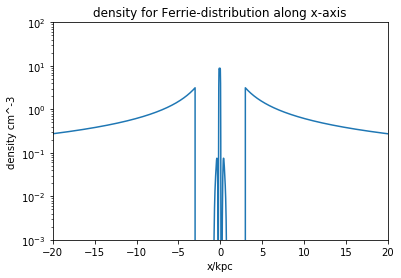

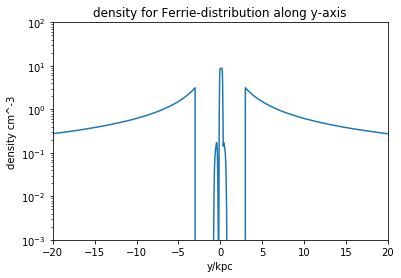

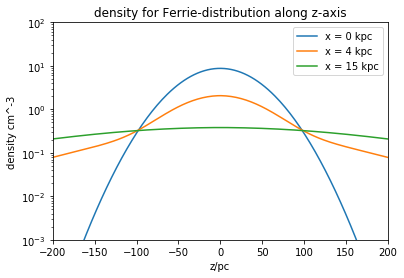

In [7]:
"""1D Darstellung für x,y,z Achse"""
plt.figure()
plt.plot(x/1000,HI_x)
plt.title('density for Ferrie-distribution along x-axis')
plt.xlabel('x/kpc')
plt.ylabel('density cm^-3')
plt.yscale('log')
plt.axis([-20,20,10**-3,10**2])

plt.figure()
plt.plot(y/1000,HI_y)
plt.title('density for Ferrie-distribution along y-axis')
plt.xlabel('y/kpc')
plt.ylabel('density cm^-3')
plt.yscale('log')
plt.axis([-20,20,10**-3,10**2])

plt.figure()
plt.plot(z,HI_z1, label='x = 0 kpc')
plt.plot(z,HI_z2, label='x = 4 kpc')
plt.plot(z,HI_z3, label='x = 15 kpc')
plt.title('density for Ferrie-distribution along z-axis')
plt.xlabel('z/pc')
plt.ylabel('density cm^-3')
plt.yscale('log')
plt.axis([-200,200,10**-3,10**2])
plt.legend()
plt.show()


/usr/lib/python3/dist-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10


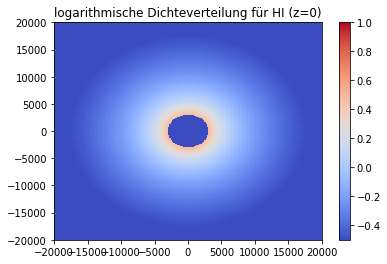

In [8]:
"""2D Darstellung bei z=0"""
xx,yy = np.meshgrid(np.linspace(-20000,20000,200),np.linspace(-20000,20000,200))
zz = np.zeros(xx.shape)
          
for i in range(xx.shape[0]): 
    for j in range(xx.shape[1]):
        h = n_HI(xx[0,j],yy[i,0],0)
        zz[i,j] = np.log10(h)


fig,axs = subplots()
plt.title('logarithmische Dichteverteilung für HI (z=0)')
p = axs.pcolor(xx, yy, zz, cmap=cm.coolwarm,vmin = -0.5,vmax=1)
cb = fig.colorbar(p)
show()

In [125]:
xA=10
yA=10
zA=5
nHI =np.zeros((int(30000/xA),int(30000/yA),int(1000/zA+1)))
print(nHI.shape)

(3000, 3000, 201)


In [126]:

for i in range(nHI.shape[0]):
    for j in range(nHI.shape[1]):
        for k in range(nHI.shape[2]):
            nHI[i,j,k] = n_HI(-15000+i*xA,-15000+j*yA,-500+k*zA)

In [127]:
Data = nHI.mean(axis=2).T

In [12]:
print(Data.shape)

(300, 300)


(3000, 3000) (3000, 3000)


/usr/lib/python3/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10


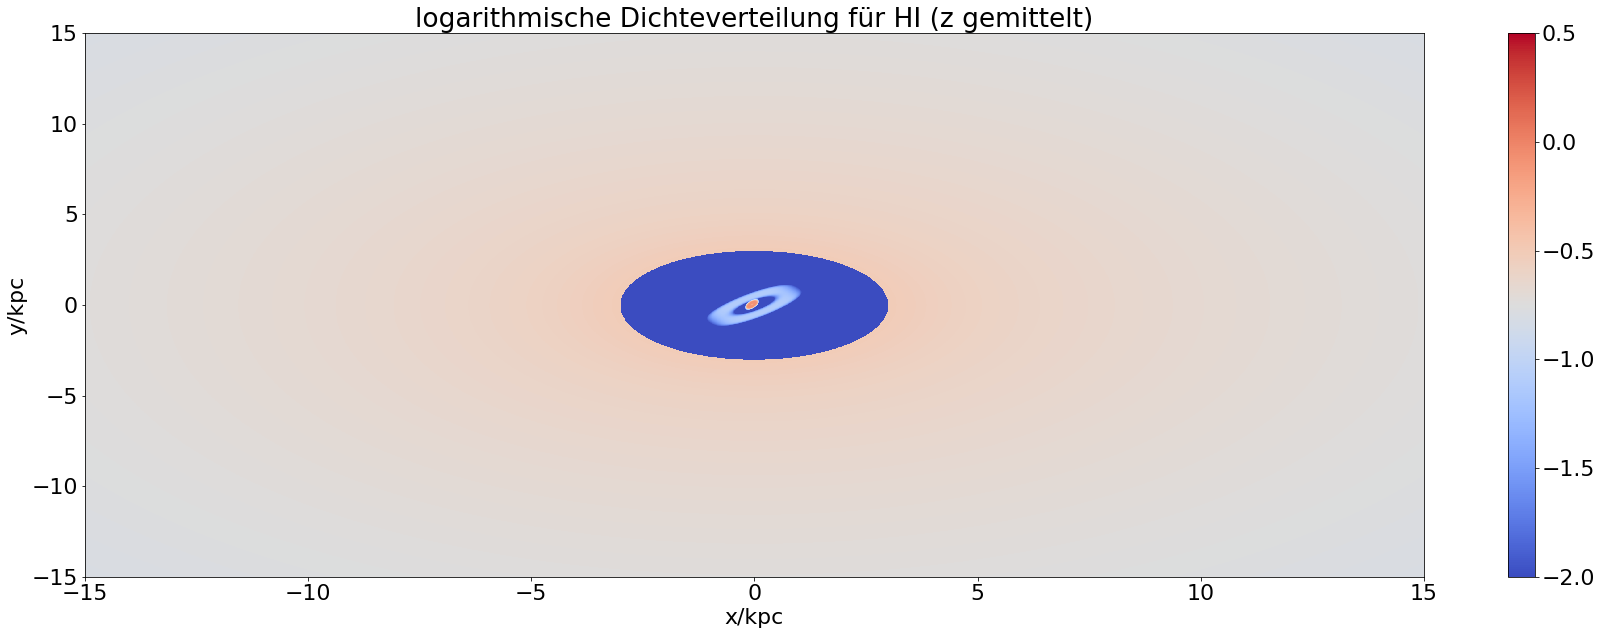

In [128]:
X,Y = np.meshgrid(np.linspace(-15000,15000,nHI.shape[0]),np.linspace(-15000,15000,nHI.shape[1]))
matplotlib.rcParams.update({'font.size': 22})
fig,axs = subplots(figsize=(30,10))
print(X.shape, Y.shape)
plt.title('logarithmische Dichteverteilung für HI (z gemittelt)')
p = axs.pcolor(X/1000, Y/1000, np.log10(Data), cmap=cm.coolwarm,vmin=-2,vmax=0.5)
cb = fig.colorbar(p)
axs.set_xlabel('x/kpc')
axs.set_ylabel('y/kpc')
plt.savefig('/home/home1/jdo/Dokumente/Graphen/06_Ferrie_HI_ges.png')
show()

In [46]:
"""Die inneren 3x3 kpc"""
xA=10
yA=10
zA=10
print(6000/xA*6000/yA*400/zA)
Daten=np.zeros((int(6000/xA)+1 ,int(6000/yA)+1,int(400/zA)))

for i in range(Daten.shape[0]):
    for j in range(Daten.shape[1]):
        for k in range(Daten.shape[2]):
            Daten[i,j,k] = n_HI(-3000+i*xA,-3000+j*yA,-200+k*zA)
Plot = Daten.mean(axis=2)
Plot = np.log10(Plot)

14400000.0


/usr/lib/python3/dist-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10


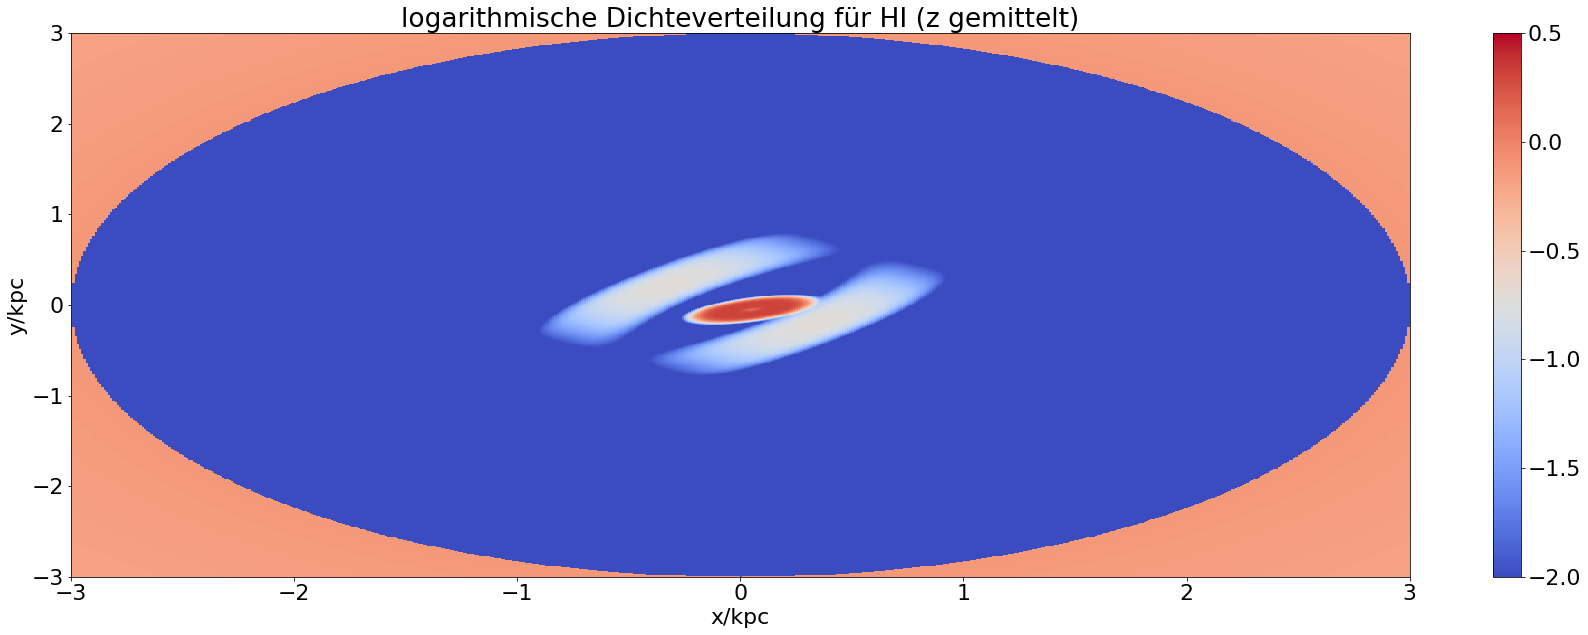

In [49]:
mgx, mgy = np.meshgrid(np.linspace(-3000,3000,Plot.shape[0]),np.linspace(-3000,3000,Plot.shape[1]))
fig,axs = subplots(figsize=(30,10))

plt.title('logarithmische Dichteverteilung für HI (z gemittelt)')
p = axs.pcolor(mgx/1000, mgy/1000, Plot, cmap=cm.coolwarm,vmin=-2,vmax=0.5)
cb = fig.colorbar(p)
axs.set_xlabel('x/kpc')
axs.set_ylabel('y/kpc')
plt.savefig('/home/home1/jdo/Dokumente/Graphen/TEST.png')
show()

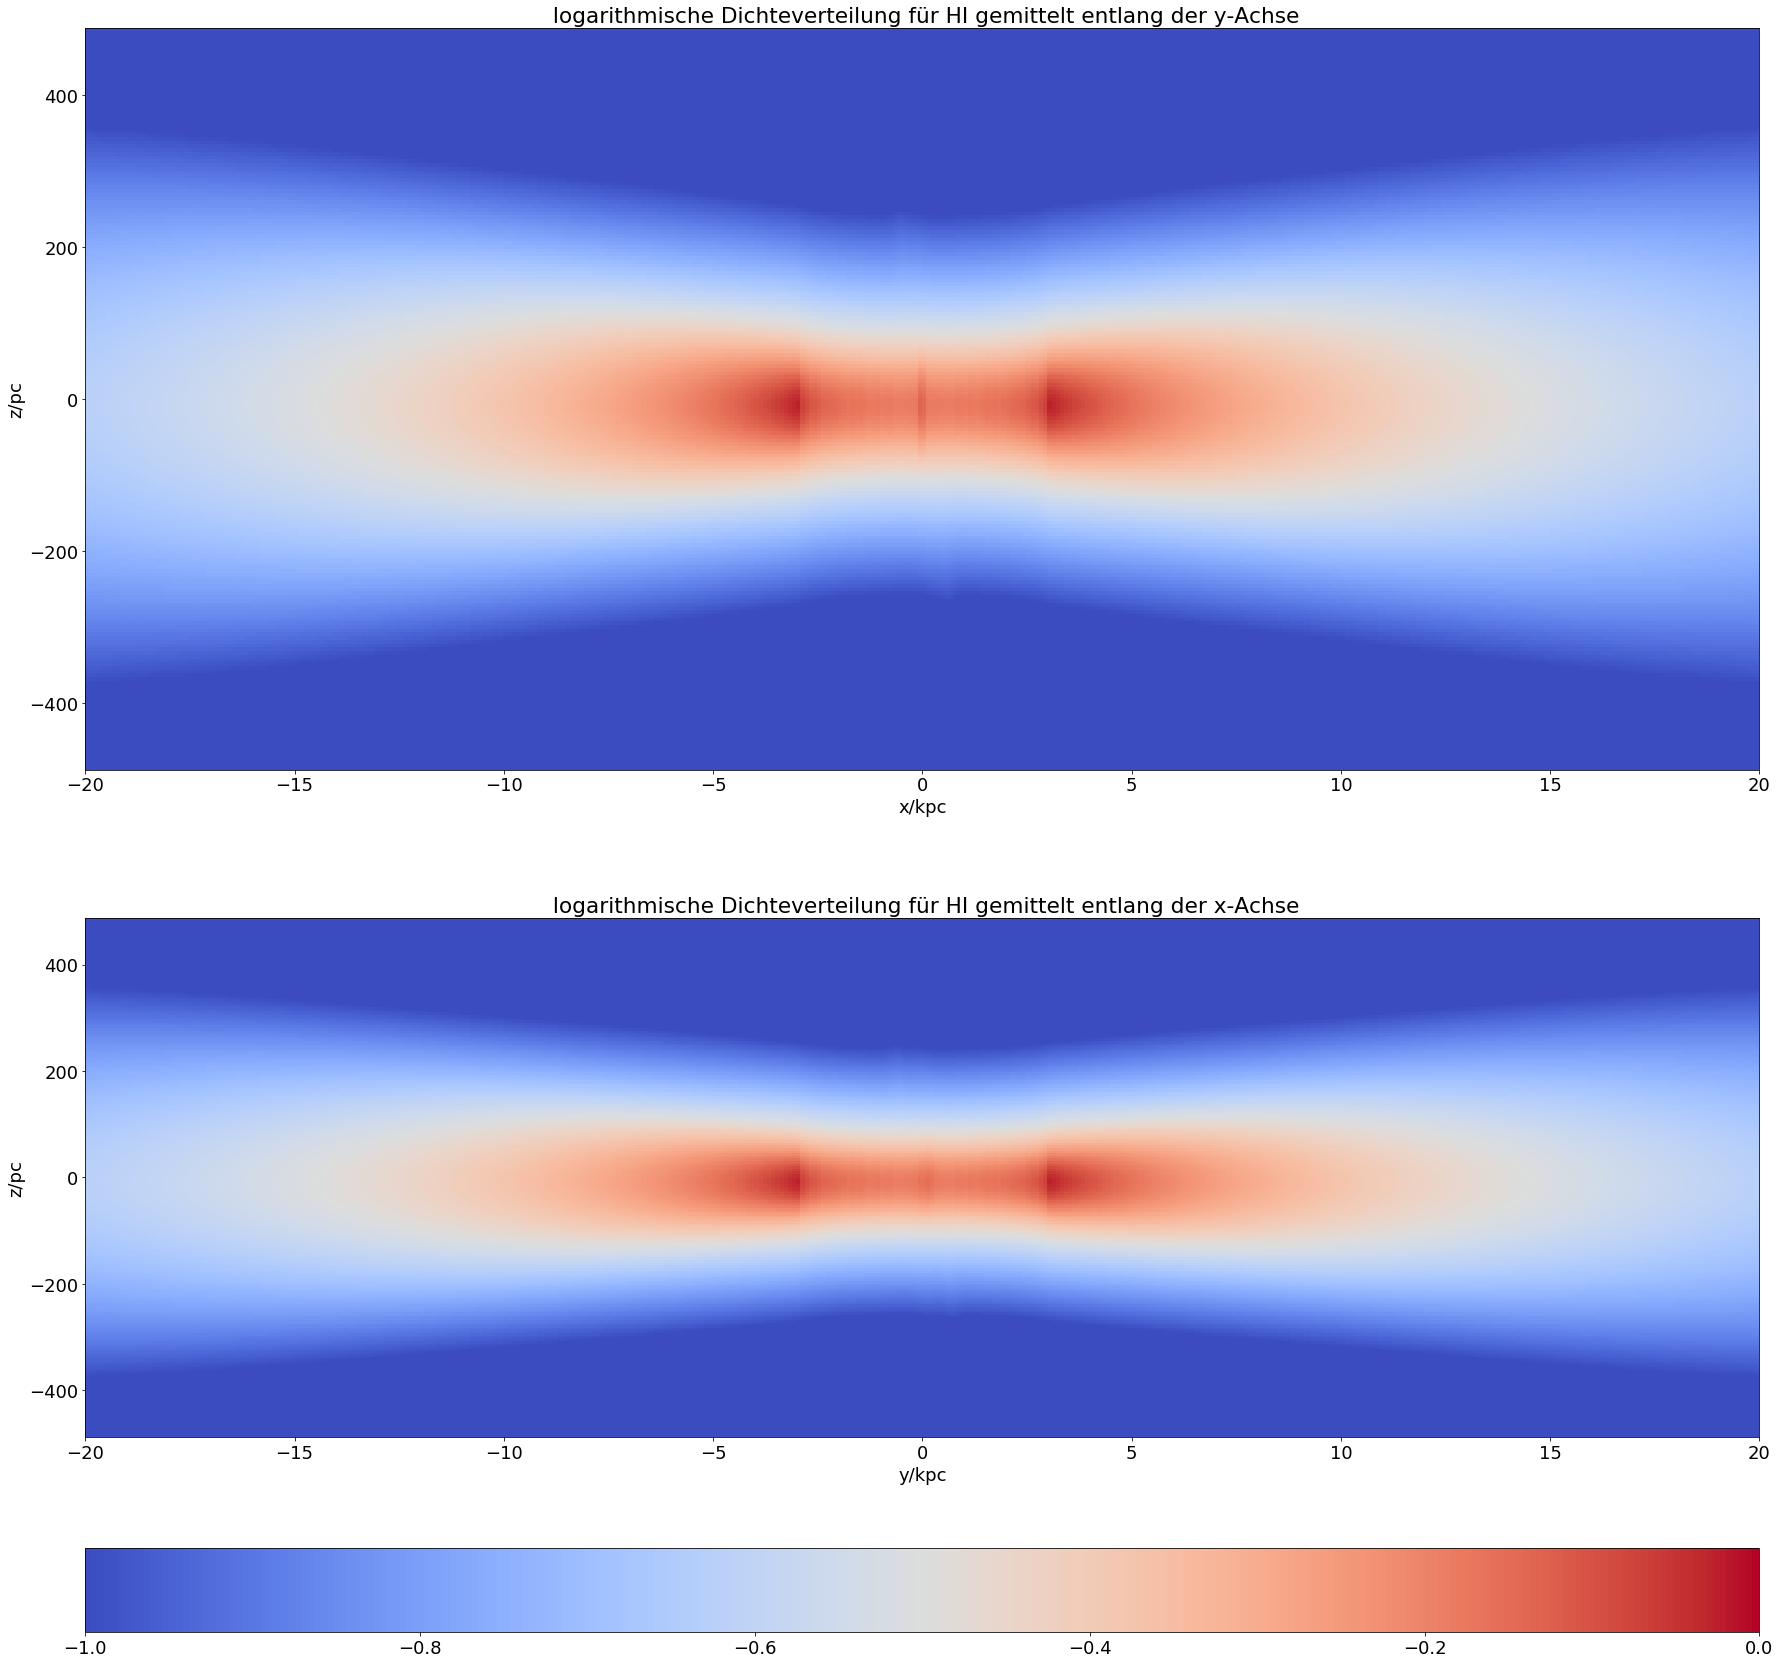

In [109]:
"""in z-Richtung"""
xz,zx= np.meshgrid(np.linspace(-487.5,487.5,200),np.linspace(-20000,20000,401))
Plot2= np.log10(nHI.mean(axis=1))

fig,axs = subplots(2,1,figsize=(30,30))
p1=axs[0].pcolor(zx/1000,xz,Plot2,cmap=cm.coolwarm, vmin=-1,vmax=0)
p2=axs[1].pcolor(zx/1000,xz,np.log10(nHI.mean(axis=0)),cmap=cm.coolwarm, vmin=-1,vmax=0)
colorbar(p1,orientation='horizontal')

axs[0].set_title(' logarithmische Dichteverteilung für HI gemittelt entlang der y-Achse')
axs[0].set_xlabel('x/kpc')
axs[0].set_ylabel('z/pc')
axs[1].set_title(' logarithmische Dichteverteilung für HI gemittelt entlang der x-Achse')
axs[1].set_xlabel('y/kpc')
axs[1].set_ylabel('z/pc')
plt.savefig('/home/home1/jdo/Dokumente/Graphen/04_Ferrie_hI_zAbhängig')
plt.show()

In [17]:
"""Darstellung der Verteilung für H2 """

'Darstellung der Verteilung für H2 '

In [45]:
fx1=np.zeros(x.shape)
fx2=np.zeros(x.shape)
fy1=np.zeros(y.shape)
fy2=fy1.copy()
fz=np.zeros((5,z.shape[0]))
for i in range(x.shape[0]):
    fx1[i]=n_H2(x[i],0,0)
    fx2[i]=n_H2(x[i],5000,0)
for i in range(y.shape[0]):
    fy1[i]=n_H2(0,y[i],0)
    fy2[i]=n_H2(5000,y[i],0)
for i in range(z.shape[0]):
    for j in range(5):
        fz[j,i]=n_H2(j*2000,0,z[i])

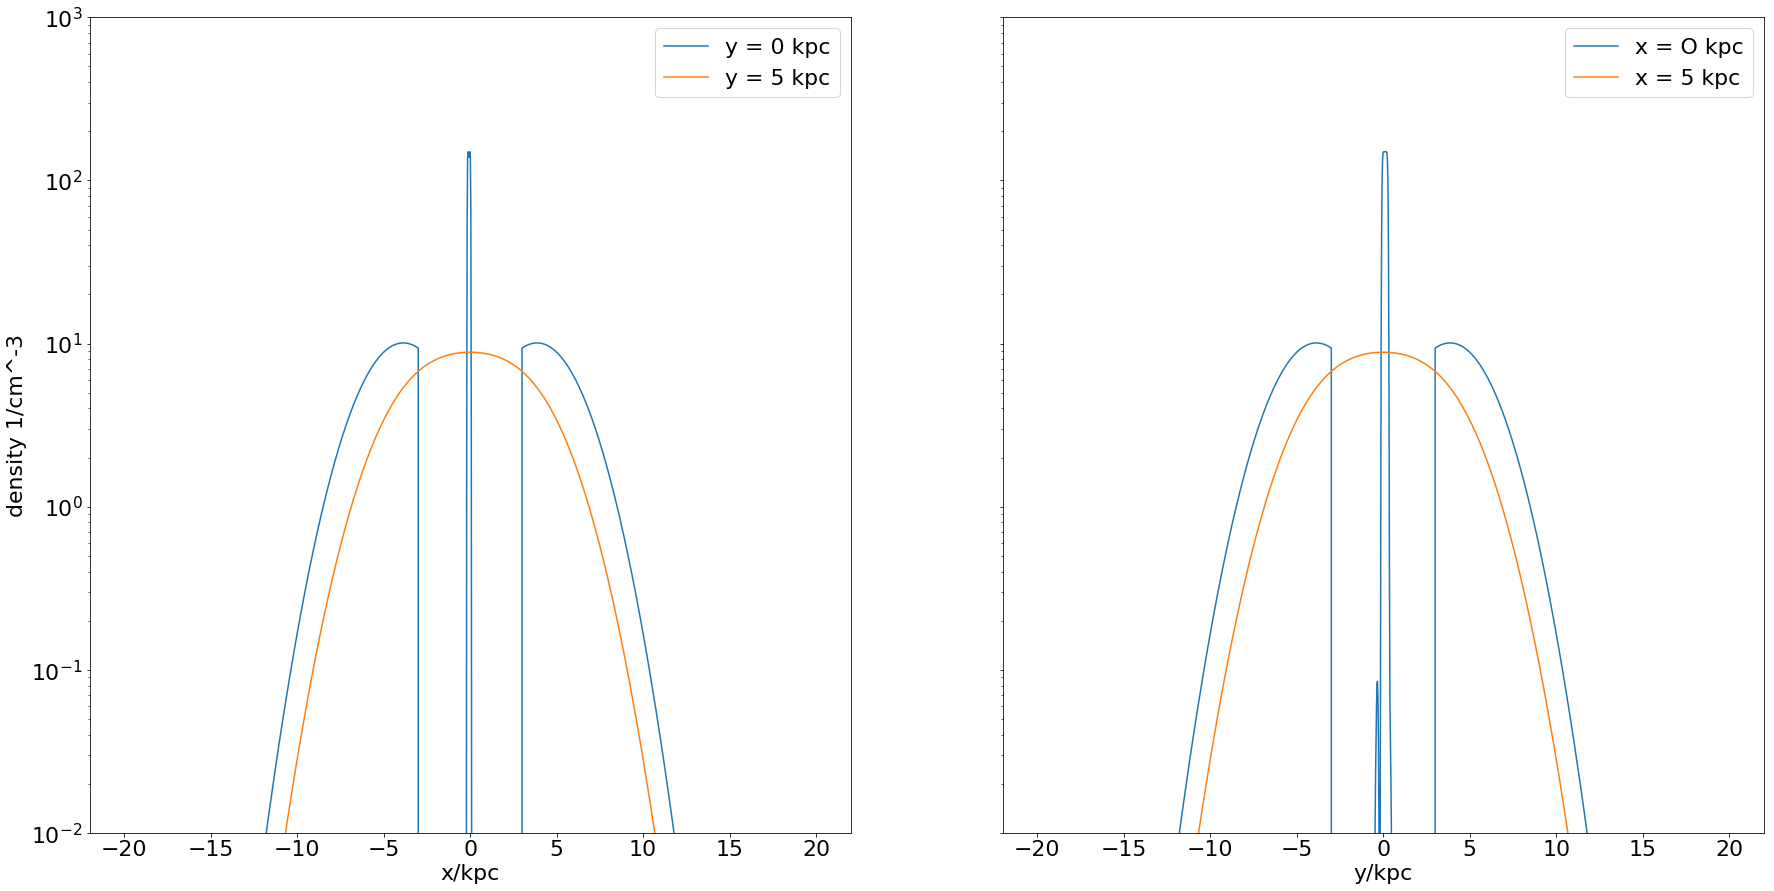

In [43]:
fig,axs=subplots(1,2,sharey=True,figsize=(30,15))
axs[0].plot(x/1000,fx1,label='y = 0 kpc')
axs[0].plot(x/1000,fx2,label='y = 5 kpc')
axs[0].set_ylim(10**-2,10**3)
plt.yscale('log')
axs[0].legend()
axs[0].set_xlabel('x/kpc')
axs[0].set_ylabel('density 1/cm^-3')

axs[1].plot(y/1000,fy1,label='x = O kpc')
axs[1].plot(y/1000,fy2,label='x = 5 kpc')
axs[1].legend()
axs[1].set_xlabel('y/kpc')
plt.show()

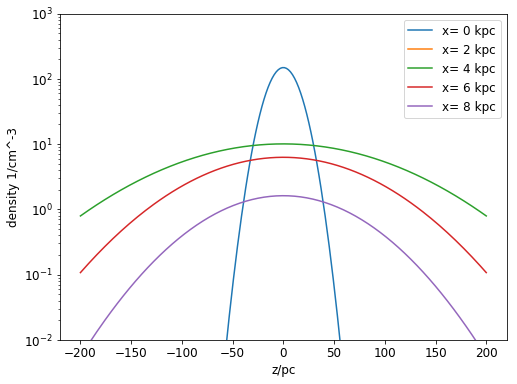

In [75]:
fig,axs = subplots(figsize=(8,6))
for i in range(fz.shape[0]):
    axs.plot(z,fz[i,:],label='x= {} kpc'.format(i*2))
axs.set_ylabel('density 1/cm^-3')
axs.set_xlabel('z/pc')
plt.yscale('log')
axs.set_ylim(10**-2,10**3)
axs.legend()
plt.show()


In [66]:
for i in range(xx.shape[0]): 
    for j in range(xx.shape[1]):
        h = n_H2(xx[0,j],yy[i,0],0)
        zz[i,j] = np.log10(h)

/usr/lib/python3/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


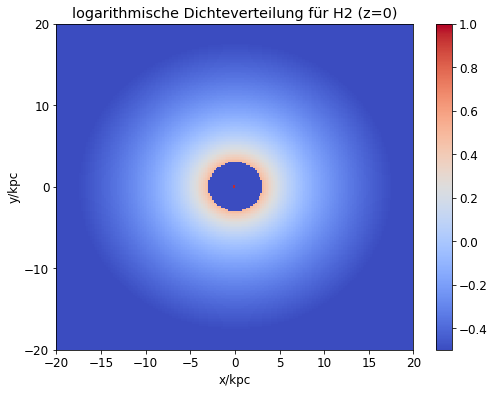

In [74]:
matplotlib.rcParams.update({'font.size': 12})
fig,axs = subplots(figsize=(8,6))
plt.title('logarithmische Dichteverteilung für H2 (z=0)')
p = axs.pcolor(xx/1000, yy/1000, zz, cmap=cm.coolwarm,vmin = -0.5,vmax=1)
cb = fig.colorbar(p)
axs.set_xlabel('x/kpc')
axs.set_ylabel('y/kpc')
axs.set_yticks([-20,-10,0,10,20])
show()

In [129]:
xA=10   #insg 30000
yA=10   #insg 30000
zA=5    #insg 10000

nH2 =np.zeros((int(30000/xA+1),int(30000/yA+1),int(1000/zA)+1))
print(nH2.shape)
for i in range(nH2.shape[0]):
    for j in range(nH2.shape[1]):
        for k in range(nH2.shape[2]):
            nH2[i,j,k] = n_H2(-15000+i*xA,-15000+j*yA,-500+k*zA)



(3001, 3001, 201)


(3001, 3001)

/usr/lib/python3/dist-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10


 (3001, 3001) (3001, 3001)


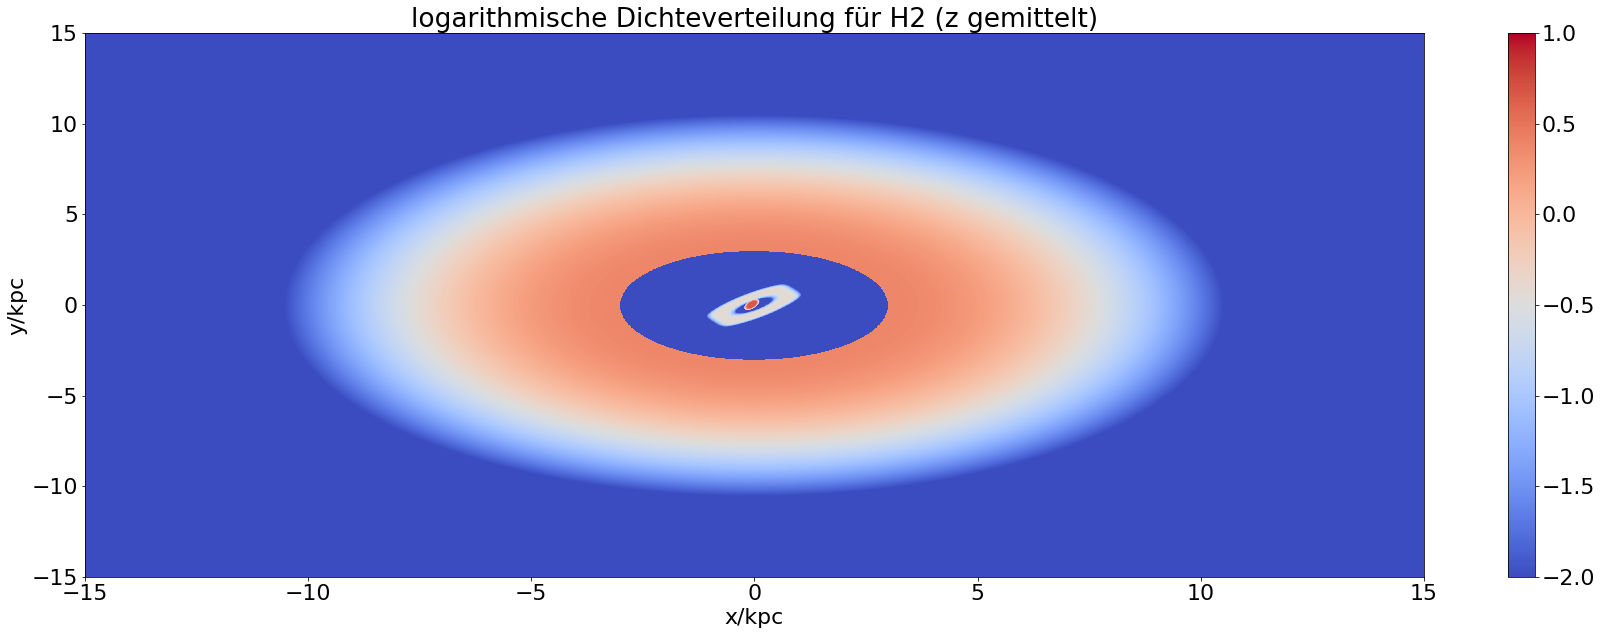

In [130]:
DataH2_full = nH2.mean(axis=2).T

X,Y=np.meshgrid(np.linspace(-15000,15000,nH2.shape[0]),np.linspace(-15000,15000,nH2.shape[1]))

print(DataH2_full.shape,X.shape,Y.shape)
fig,axs = subplots(figsize=(30,10))

plt.title('logarithmische Dichteverteilung für H2 (z gemittelt)')
p = axs.pcolor(X/1000, Y/1000, np.log10(DataH2_full), cmap=cm.coolwarm,vmin=-2,vmax=1)
cb = fig.colorbar(p)
axs.set_xlabel('x/kpc')
axs.set_ylabel('y/kpc')
plt.savefig('/home/home1/jdo/Dokumente/Graphen/05_Ferrie_H2_ges.png')
show()

In [131]:
"""die inneren 3x3 kpc"""
xA=10
yA=10
zA=10
print(6000/xA*6000/yA*400/zA)
DataH2_innen=np.zeros((int(6000/xA)+1 ,int(6000/yA)+1,int(400/zA)))

for i in range(DataH2_innen.shape[0]):
    for j in range(DataH2_innen.shape[1]):
        for k in range(DataH2_innen.shape[2]):
            DataH2_innen[i,j,k] = n_H2(-3000+i*xA,-3000+j*yA,-200+k*zA)
PlotH2 =np.log10(DataH2_innen.mean(axis=2))

14400000.0


/usr/lib/python3/dist-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10


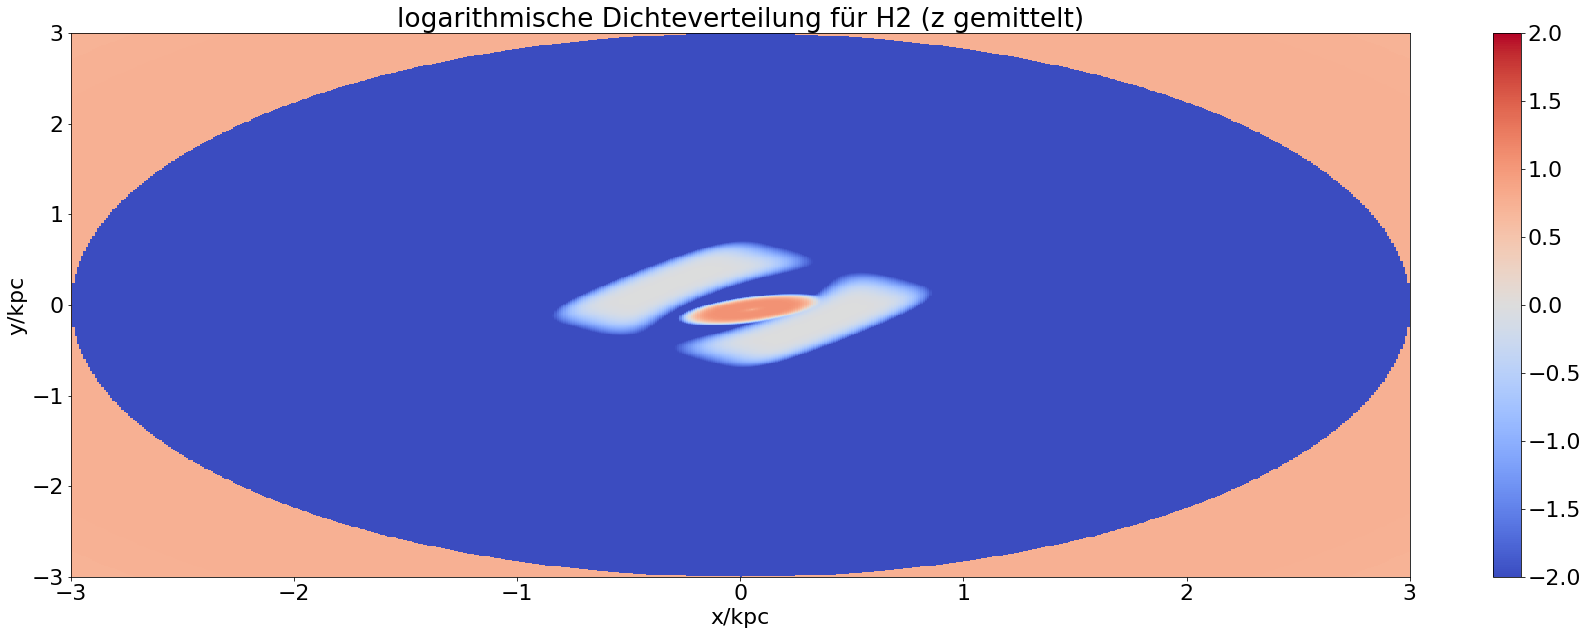

In [132]:
mgx2, mgy2 = np.meshgrid(np.linspace(-3000,3000,PlotH2.shape[0]),np.linspace(-3000,3000,PlotH2.shape[1]))
fig,axs = subplots(figsize=(30,10))

plt.title('logarithmische Dichteverteilung für H2 (z gemittelt)')
p = axs.pcolor(mgx2/1000, mgy2/1000, PlotH2, cmap=cm.coolwarm,vmin=-2,vmax=2)
cb = fig.colorbar(p)
axs.set_xlabel('x/kpc')
axs.set_ylabel('y/kpc')
plt.savefig('/home/home1/jdo/Dokumente/Graphen/02_Ferrie_innen_H2.png')
show()

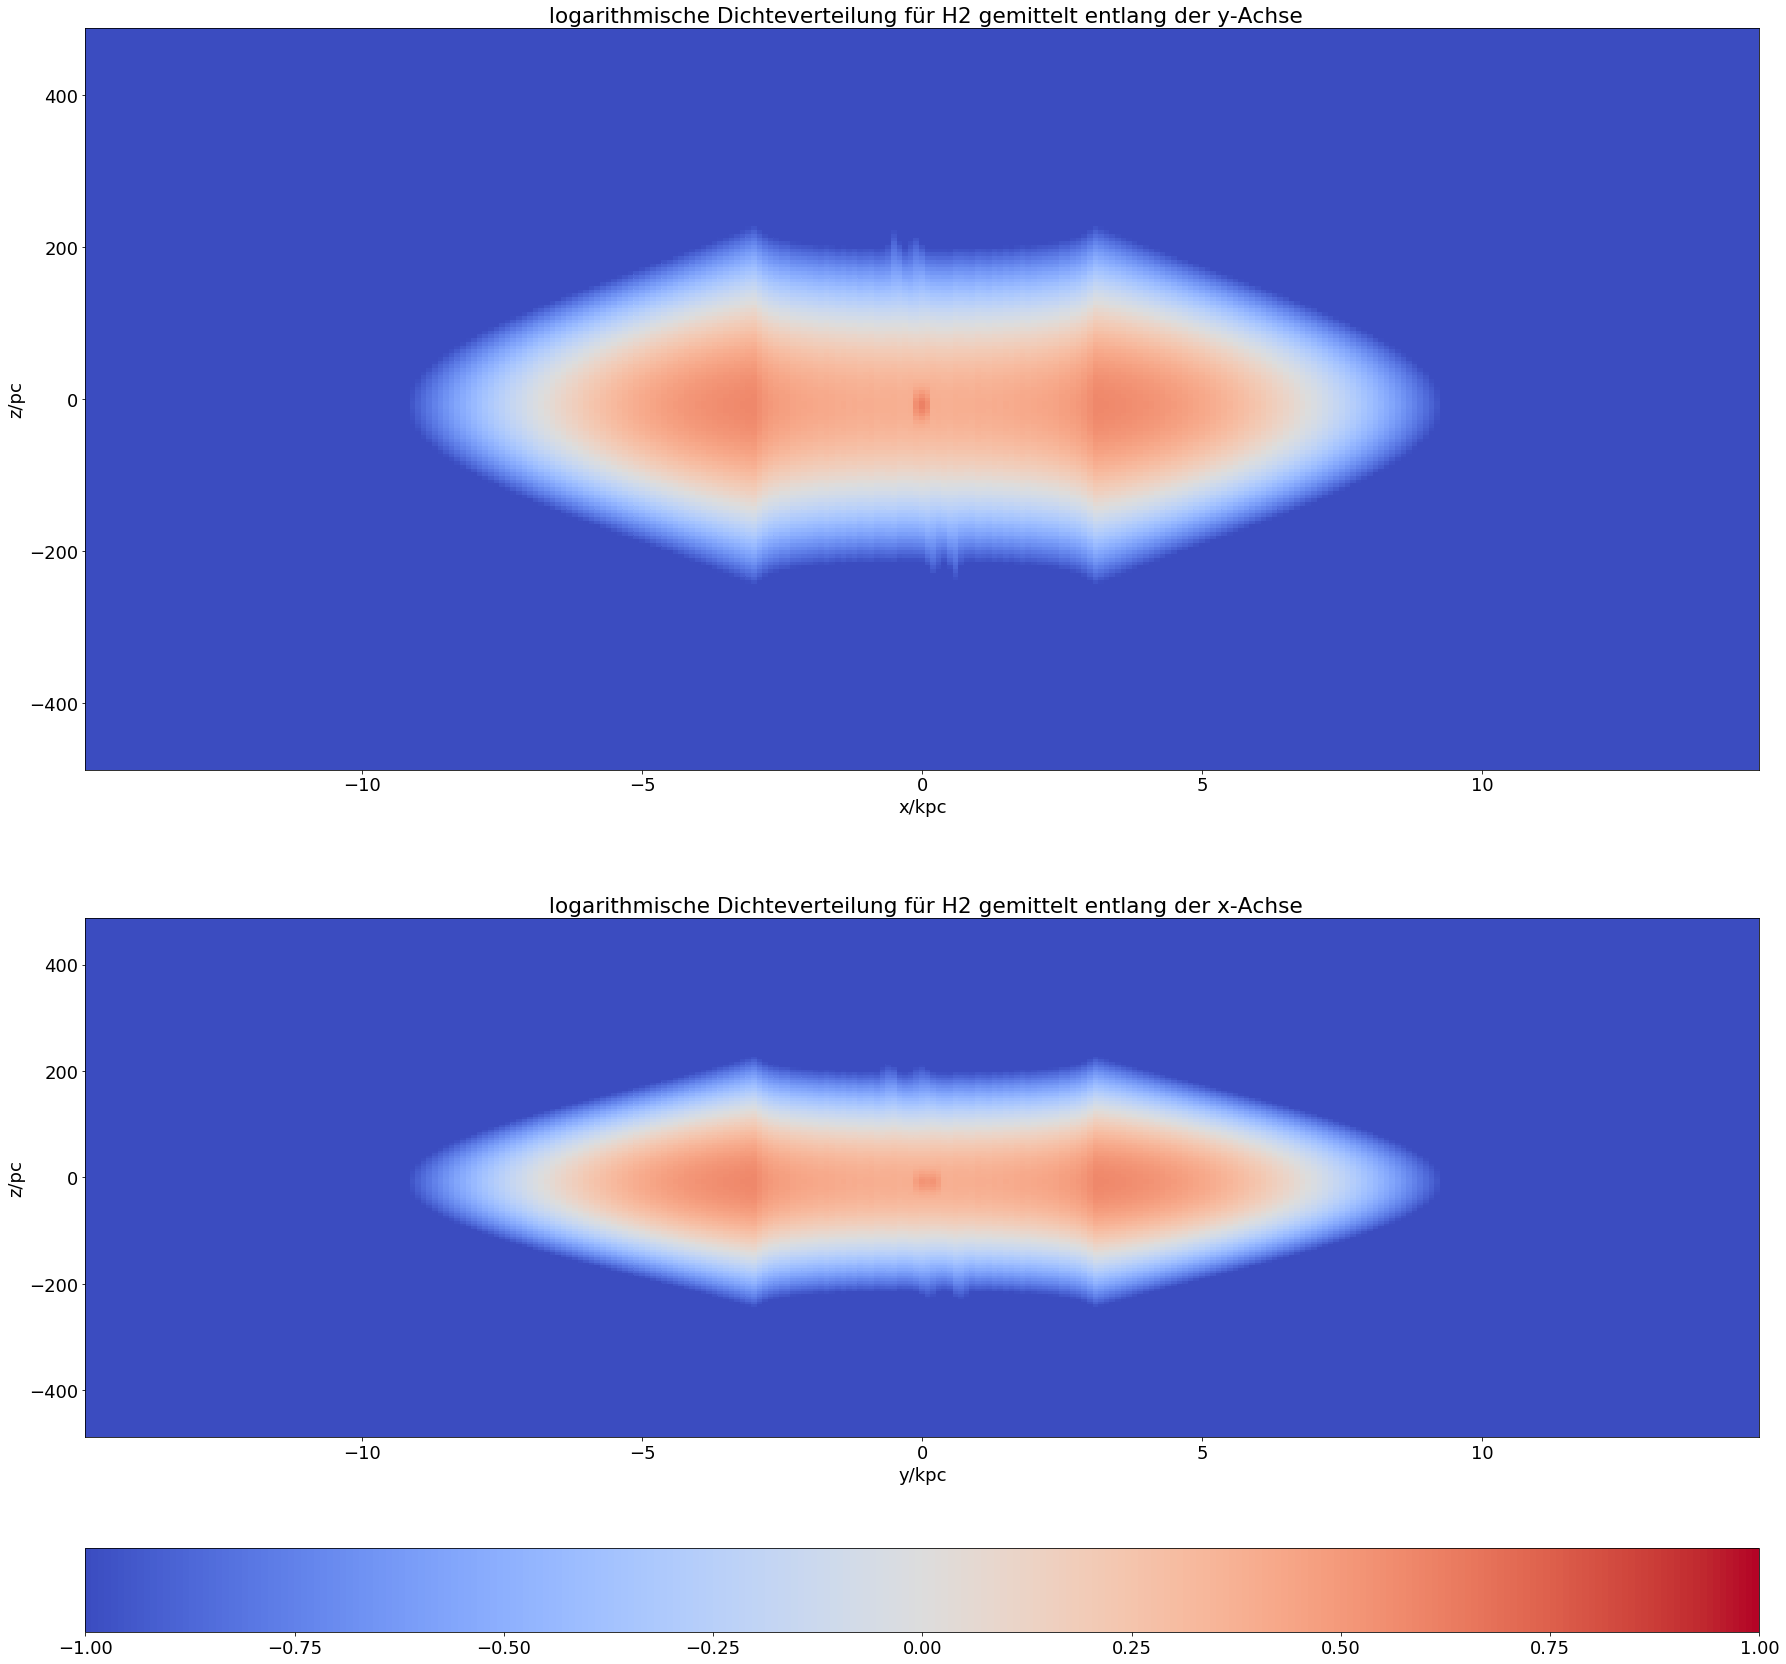

In [94]:
"""in z-Richtung"""
matplotlib.rcParams.update({'font.size': 18})

xz,zx= np.meshgrid(np.linspace(-487.5,487.5,200),np.linspace(-14950,14950,300))

fig,axs = subplots(2,1,figsize=(30,30))
p1=axs[0].pcolor(zx/1000,xz,np.log10(nH2.mean(axis=1)),cmap=cm.coolwarm, vmin=-1,vmax=1)
p2=axs[1].pcolor(zx/1000,xz,np.log10(nH2.mean(axis=0)),cmap=cm.coolwarm, vmin=-1,vmax=1)
colorbar(p1,orientation='horizontal')

axs[0].set_title(' logarithmische Dichteverteilung für H2 gemittelt entlang der y-Achse')
axs[0].set_xlabel('x/kpc')
axs[0].set_ylabel('z/pc')
axs[1].set_title(' logarithmische Dichteverteilung für H2 gemittelt entlang der x-Achse')
axs[1].set_xlabel('y/kpc')
axs[1].set_ylabel('z/pc')
plt.savefig('/home/home1/jdo/Dokumente/Graphen/03_Ferrie_H2_zAnschicht.png')
plt.show()

In [28]:
"""Ansicht der HII-Verteilung"""

'Ansicht der HII-Verteilung'

In [6]:
xA=50   #pc
yA=50   #pc
zA= 50  #pc

Data_H2=np.zeros((int(30000/xA+1),int(30000/yA+1),int(3000/zA+1)))
print(Data_H2.shape)

(601, 601, 61)


In [ ]:
for i in range(Data_H2.shape[0]):
    for j in range(Data_H2.shape[1]):
        for k in range(Data_H2.shape[2]):
            Data_H2[i,j,k]=n_HII(-15000+i*xA,-15000+j*yA,-1500+k*zA)
Data_H2_log = np.log10(Data_H2)

In [ ]:
""" 1D Darstellung """
x=np.linspace(-15000,15000,Data_H2.shape[0])
y=np.linspace(-15000,15000,Data_H2.shape[1])
z=np.linspace(-1500,1500,Data_H2.shape[2])

fig,axs=subplots(1,2,figsize=(16,6),sharey=True)
axs[0].plot(x/1000,Data_H2[:,int((Data_H2.shape[1]-1)/2+1),int(1500/zA)],label='y = 0 kpc')
axs[0].plot(x/1000,Data_H2[:,int(20000/yA+1),int(1500/zA+1)],label='y = 5 kpc')
axs[0].set_title('Dichteverteilung entlang der x-Achse')
axs[0].set_xlabel('x/kpc')
axs[0].legend()

axs[1].plot(y/1000,Data_H2[int((Data_H2.shape[0]-1)/2+1),:,int(1500/zA+1)],label='x = 0 kpc')
axs[1].plot(y/1000,Data_H2[int(20000/xA+1),:,int(1500/zA+1)],label='x = 5 kpc')
axs[1].set_title('Dichteverteilung entlang der y-Achse')
axs[1].set_xlabel('y/kpc')
axs[1].legend()

axs[0].set_ylabel('denisty 1/cm^-3')


show()

In [ ]:
xx,yy=np.meshgrid(x,y)

fig,axs=subplots(2,1,figsize=(8,14))
for ax in axs:
    p=ax.pcolor(xx/1000,yy/1000,Data_H2_log.mean(axis=2),cmap=cm.coolwarm,vmin=-2,vmax=0.5)
    ax.set_xlabel('x/kpc')
    ax.set_ylabel('y/kpc')

cb=colorbar(p, label='log density 1/cm^3',orientation='horizontal')
axs[0].set_title('logarithmische Dichteverteilung für HII')
axs[1].set_ylim(-3,3)
axs[1].set_xlim(-3,3)
axs[1].set_title('die inneren 3kp x 3 kpc')
plt.savefig('/home/home1/jdo/Dokumente/Graphen/07_Ferrie_HII_ges_3kpc.png')
show()

In [ ]:
"""in z-Richtung"""
xz,zx= np.meshgrid(x,z)
print(xz.shape, Data_H2_log.mean(axis=1).shape)
fig,axs = subplots(2,1,figsize=(30,30))
p1=axs[0].pcolor(xz/1000,zx,Data_H2_log.mean(axis=1).T,cmap=cm.coolwarm)
p2=axs[1].pcolor(xz/1000,zx,Data_H2_log.mean(axis=0).T,cmap=cm.coolwarm, vmin=-1,vmax=1)
colorbar(p1,orientation='horizontal')

axs[0].set_title(' logarithmische Dichteverteilung für HII gemittelt entlang der y-Achse')
axs[0].set_xlabel('x/kpc')
axs[0].set_ylabel('z/pc')
axs[1].set_title(' logarithmische Dichteverteilung für HII gemittelt entlang der x-Achse')
axs[1].set_xlabel('y/kpc')
axs[1].set_ylabel('z/pc')
plt.savefig('/home/home1/jdo/Dokumente/Graphen/08_Ferrie_HII_zAnschicht.png')
plt.show()

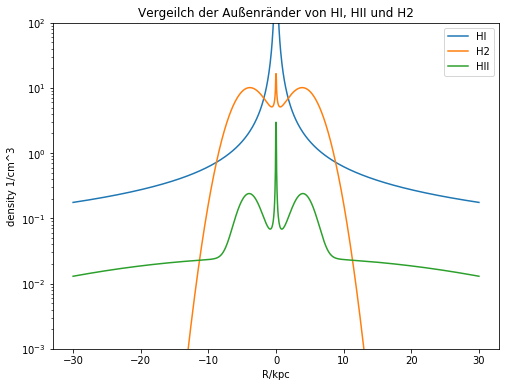

(1000,)


In [27]:
"""Vergleich der Außenränder"""

x2=np.linspace(-30000,30000,1000)

fig,ax =subplots(figsize=(8,6))
plt.title('Vergeilch der Außenränder von HI, HII und H2')
ax.plot(x2/1000,n_A_HI(abs(x2),0),label='HI')
ax.plot(x2/1000,n_A_H2(abs(x2),0),label='H2')
ax.plot(x2/1000,n_A_HII(abs(x2),0),label='HII')
ax.set_ylim(10**-3,10**2)
ax.set_xlabel('R/kpc')
ax.set_ylabel('density 1/cm^3')
plt.legend()
plt.yscale('log')
plt.show()

print(x2.shape)